## <p style="background-color:#4A90E8; color:#FFFFFF; font-size:110%; text-align:center; border: 8px solid #357ABD; padding: 12px 25px; border-radius: 40px 20px; line-height: 1.3em; margin-bottom: 15px;">
<strong>Projet :</strong> Moteur de recommandation de produits pour une boutique en ligne  
<strong>Algorithme :</strong> FP-Growth  
<strong>Nom :</strong> Isseu GUEYE
</p>

---

- Professeur : [**Sayoba GANSANE**]()
- École : [**Université Alioune Diop de Bambey (UADB)**]()
- Cours : [**Data Mining Approche Informatique**]()
- Niveau : [**Master 2**]()
- Parcours : [*Statistique et Informatique Décisionnelle (SID)*]()
- Période : [*Mai 2025*]()


In [196]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

In [197]:
df = pd.read_csv("donnees_ecommerce.csv", encoding='ISO-8859-1')
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France


# Aperçu des données

In [198]:
def getDuplicateColumns(base):
    duplicateColumnNames = set()
    for x in range(base.shape[1]):
        col = base.iloc[:, x]
        for y in range(x + 1, base.shape[1]):
            otherCol = base.iloc[:, y]
            if col.equals(otherCol):
                duplicateColumnNames.add(base.columns.values[y])
    return list(duplicateColumnNames)

def stat_globale_df(base):
    stats = {
        "Indicateur": [
            "Nombre de variables",
            "Nombre d'observations",
            "Nombre de valeurs manquantes",
            "Pourcentage de valeurs manquantes",
            "Nombre de lignes dupliquées",
            "Pourcentage de lignes dupliquées",
            "Nombre de lignes entièrement vides",
            "Pourcentage de lignes vides",
            "Nombre de colonnes vides",
            "Pourcentage de colonnes vides",
            "Colonnes avec noms dupliqués",
            "Nombre de colonnes dupliquées"
        ],
        "Valeur": [
            base.shape[1],
            base.shape[0],
            base.isna().sum().sum(),
            "{:.2%}".format(base.isna().sum().sum() / base.size),
            base.duplicated().sum(),
            "{:.2%}".format(base.duplicated().sum() / len(base)),
            base.isna().all(axis=1).sum(),
            "{:.2%}".format(base.isna().all(axis=1).sum() / len(base)),
            base.isnull().all().sum(),
            "{:.2%}".format(base.isnull().all().sum() / base.shape[1]),
            base.columns.duplicated().sum(),
            len(getDuplicateColumns(base))
        ]
    }

    return pd.DataFrame(stats)


In [199]:
statistiques = stat_globale_df(df)
print(statistiques)

                            Indicateur  Valeur
0                  Nombre de variables       8
1                Nombre d'observations  541909
2         Nombre de valeurs manquantes  136534
3    Pourcentage de valeurs manquantes   3.15%
4          Nombre de lignes dupliquées    5268
5     Pourcentage de lignes dupliquées   0.97%
6   Nombre de lignes entièrement vides       0
7          Pourcentage de lignes vides   0.00%
8             Nombre de colonnes vides       0
9        Pourcentage de colonnes vides   0.00%
10        Colonnes avec noms dupliqués       0
11       Nombre de colonnes dupliquées       0


In [200]:

def resume_simple(df):
    print("Aperçu  de la base :")
    print("\n Types de variables :")
    print(df.dtypes)
    print("\n Valeurs manquantes par variable :")
    print(df.isnull().sum())
    print("\n Nombre de doublons :", df.duplicated().sum())


In [201]:
resume_simple(df)

Aperçu  de la base :

 Types de variables :
InvoiceNo       object
StockCode       object
Description     object
Quantity         int64
InvoiceDate     object
UnitPrice      float64
CustomerID     float64
Country         object
dtype: object

 Valeurs manquantes par variable :
InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

 Nombre de doublons : 5268


In [202]:
df.sample(5)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
318362,564835,22653,BUTTON BOX,1,8/30/2011 12:31,1.63,NaN,United Kingdom
18528,537823,90120A,PINK MURANO TWIST BRACELET,1,12/8/2010 14:25,4.24,NaN,United Kingdom
13713,537434,22845,VINTAGE CREAM CAT FOOD CONTAINER,4,12/6/2010 16:57,12.72,NaN,United Kingdom
39927,539718,20966,SANDWICH BATH SPONGE,1,12/21/2010 13:06,2.51,NaN,United Kingdom
488175,577798,35970,ZINC FOLKART SLEIGH BELLS,6,11/21/2011 16:54,1.69,17757.0,United Kingdom


# Nettoyage des données

In [203]:
# Suppression des lignes entièrement vides
df = df.dropna(how='all')

# Suppression des doublons
df = df.drop_duplicates()

# Suppression des transactions sans CustomerID (non identifiables)
df = df[~df['CustomerID'].isna()]

# Suppression des valeurs manquantes restantes
df = df.dropna()

# Conversion des types de colonnes si nécessaire
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
# Réinitialiser les index
df.reset_index(drop=True, inplace=True)


In [204]:
print("Dimensions après nettoyage :", df.shape)
print("Valeurs manquantes restantes :", df.isnull().sum().sum())


Dimensions après nettoyage : (401604, 8)
Valeurs manquantes restantes : 0


In [205]:
statistiques = stat_globale_df(df)
print(statistiques)

                            Indicateur  Valeur
0                  Nombre de variables       8
1                Nombre d'observations  401604
2         Nombre de valeurs manquantes       0
3    Pourcentage de valeurs manquantes   0.00%
4          Nombre de lignes dupliquées       0
5     Pourcentage de lignes dupliquées   0.00%
6   Nombre de lignes entièrement vides       0
7          Pourcentage de lignes vides   0.00%
8             Nombre de colonnes vides       0
9        Pourcentage de colonnes vides   0.00%
10        Colonnes avec noms dupliqués       0
11       Nombre de colonnes dupliquées       0


In [206]:

# Liste des produits unique
liste= data['StockCode'].unique()

stock_to_del=[]

for el in liste:
    if el[0] not in ['1', '2', '3', '4,', '5', '6', '7', '8', '9', '10'] :
        stock_to_del.append(el)

data=data[data['StockCode'].map(lambda x : x not in stock_to_del)]

basket=data.groupby(['InvoiceNo', 'Description'])['StockCode'].count().unstack().fillna(0)

basket =basket.applymap(lambda x : 1 if x>0  else 0)


In [207]:
basket

Description,4 PURPLE FLOCK DINNER CANDLES,50'S CHRISTMAS GIFT BAG LARGE,DOLLY GIRL BEAKER,I LOVE LONDON MINI BACKPACK,I LOVE LONDON MINI RUCKSACK,NINE DRAWER OFFICE TIDY,OVAL WALL MIRROR DIAMANTE,RED SPOT GIFT BAG LARGE,SET 2 TEA TOWELS I LOVE LONDON,SPACEBOY BABY GIFT SET,...,ZINC STAR T-LIGHT HOLDER,ZINC SWEETHEART SOAP DISH,ZINC SWEETHEART WIRE LETTER RACK,ZINC T-LIGHT HOLDER STAR LARGE,ZINC T-LIGHT HOLDER STARS LARGE,ZINC T-LIGHT HOLDER STARS SMALL,ZINC TOP 2 DOOR WOODEN SHELF,ZINC WILLIE WINKIE CANDLE STICK,ZINC WIRE KITCHEN ORGANISER,ZINC WIRE SWEETHEART LETTER TRAY
InvoiceNo,,,,,,,,,,,,,,,,,,,,,
536365,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536366,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536367,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536368,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536369,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
C581470,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
C581484,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
C581490,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [208]:
import mlxtend
from mlxtend.frequent_patterns import fpgrowth
from mlxtend.frequent_patterns import association_rules
import time

In [209]:
a=time.time()
frequent_itemsets = fpgrowth(basket, min_support=0.01, use_colnames=True)

rules = association_rules(frequent_itemsets, metric='lift', min_threshold=1.0)

b=time.time()

print('\n Temps d\'exution en seconde : \n', b-a, 's.')
print('\n Nombre de règle généré : \n', len(rules))


 Temps d'exution en seconde : 
 146.59653759002686 s.

 Nombre de règle généré : 
 584


In [210]:
rules.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
0,(ASSORTED COLOUR BIRD ORNAMENT),(WHITE HANGING HEART T-LIGHT HOLDER),0.063825,0.092765,0.012488,0.195668,2.109286,1.0,0.006568,1.127936,0.561760,0.086665,0.113425,0.165146
1,(WHITE HANGING HEART T-LIGHT HOLDER),(ASSORTED COLOUR BIRD ORNAMENT),0.092765,0.063825,0.012488,0.134625,2.109286,1.0,0.006568,1.081814,0.579680,0.086665,0.075627,0.165146
2,(ASSORTED COLOUR BIRD ORNAMENT),(REGENCY CAKESTAND 3 TIER),0.063825,0.086820,0.010645,0.166787,1.921060,1.0,0.005104,1.095974,0.512142,0.076037,0.087570,0.144699
3,(REGENCY CAKESTAND 3 TIER),(ASSORTED COLOUR BIRD ORNAMENT),0.086820,0.063825,0.010645,0.122611,1.921060,1.0,0.005104,1.067002,0.525038,0.076037,0.062794,0.144699
4,(HOME BUILDING BLOCK WORD),(LOVE BUILDING BLOCK WORD),0.032258,0.025668,0.012673,0.392857,15.305206,1.0,0.011845,1.604782,0.965818,0.280041,0.376862,0.443287


In [211]:
rules ['pair_key']=rules.apply(lambda row : tuple(sorted([row['antecedents'], row['consequents']])), axis=1)
rules=rules.drop_duplicates(subset='pair_key')

rules. drop(columns ='pair_key', inplace=True)

# Conversion en liste
rules['antecedents']= rules['antecedents'].apply(lambda x : list(x))
rules['consequents']= rules['consequents'].apply(lambda x : list(x))

rules.to_csv("association_rules.csv", index=False)

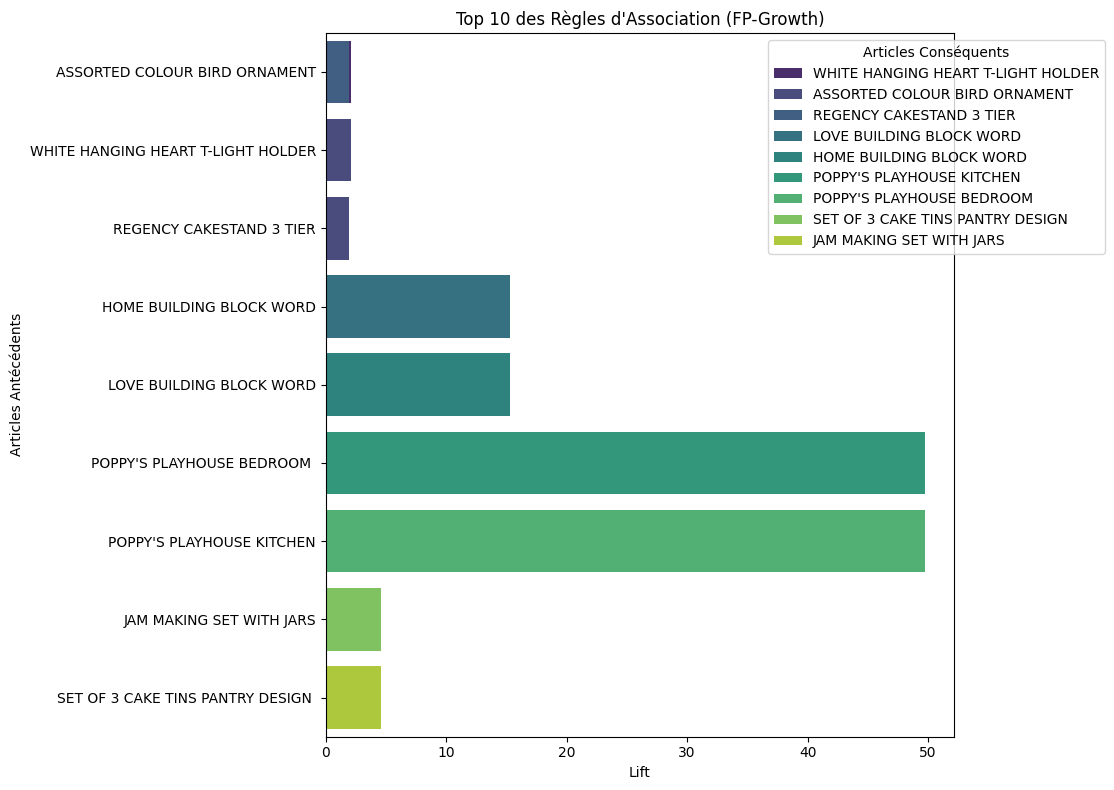

In [212]:


# Conversion des listes en chaînes formatées
rules['antecedents_str'] = rules['antecedents'].apply(lambda x: ", ".join(x))
rules['consequents_str'] = rules['consequents'].apply(lambda x: ", ".join(x))

# Visualisation avec Seaborn
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 8))
sns.barplot(
    x='lift', 
    y='antecedents_str', 
    data=rules.head(10), 
    hue='consequents_str',
    palette='viridis',
    dodge=False
)

plt.title("Top 10 des Règles d'Association (FP-Growth)")
plt.xlabel('Lift')
plt.ylabel('Articles Antécédents')
plt.legend(title='Articles Conséquents', bbox_to_anchor=(1.25, 1))
plt.tight_layout()
plt.show()


In [213]:
# Affichage des 10 règles les plus fortes
print(rules[['antecedents', 'support', 'confidence', ]].head(10))

                            antecedents   support  confidence
0       [ASSORTED COLOUR BIRD ORNAMENT]  0.012488    0.195668
1  [WHITE HANGING HEART T-LIGHT HOLDER]  0.012488    0.134625
2       [ASSORTED COLOUR BIRD ORNAMENT]  0.010645    0.166787
3            [REGENCY CAKESTAND 3 TIER]  0.010645    0.122611
4            [HOME BUILDING BLOCK WORD]  0.012673    0.392857
5            [LOVE BUILDING BLOCK WORD]  0.012673    0.493716
6          [POPPY'S PLAYHOUSE BEDROOM ]  0.011751    0.799373
7           [POPPY'S PLAYHOUSE KITCHEN]  0.011751    0.730659
8            [JAM MAKING SET WITH JARS]  0.011382    0.255959
9   [SET OF 3 CAKE TINS PANTRY DESIGN ]  0.011382    0.202791


In [214]:
df.to_csv('ecommerce_nettoye.csv', index=False)